In [1]:
import pycountry

countrieRus=list(pycountry.subdivisions.get(country_code='RU'))
russiaSubjects= [x.name for x in countrieRus]
# print russiaCities


In [2]:
len(russiaSubjects)

83

/Users/iliassa/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/iliassa/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/iliassa/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/iliassa/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

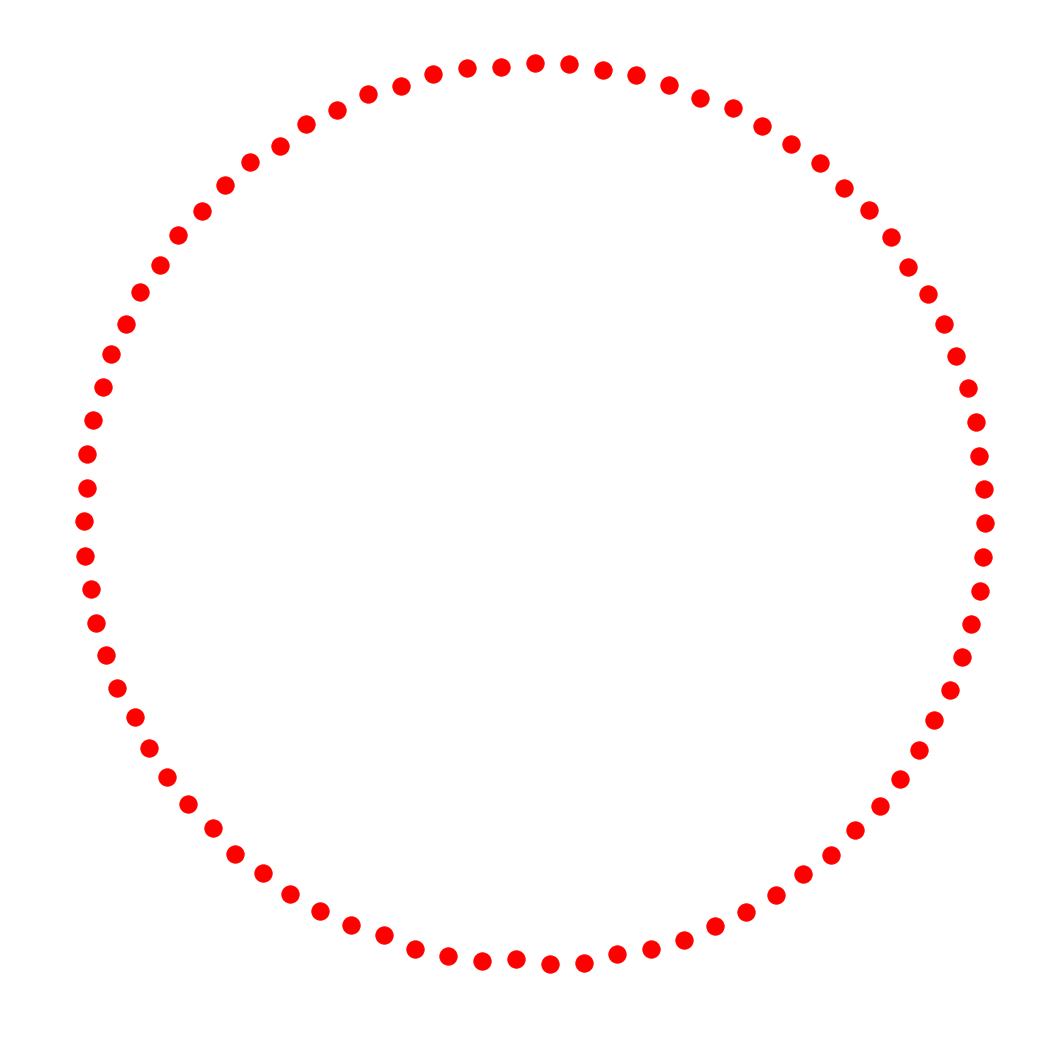

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

RUS = nx.Graph()
RUS.add_nodes_from(russiaSubjects)

plt.figure(figsize=(14,14))
nx.draw(RUS)
plt.show()

In [13]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""SELECT ?oblastLabel ?borderLabel WHERE {
  ?oblast wdt:P31 wd:Q835714.
  ?border wdt:P47 ?oblast.
 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

rusOblast = []
for result in results["results"]["bindings"]:
    # Bordering Oblasts
    nb_oblasts = result['oblastLabel']['value'], result['borderLabel']['value']
    rusOblast.append(nb_oblasts)

In [30]:
#rusOblast

In [44]:
oblastNames = list(set([x[0] for x in rusianOblast]))
oblastNames

[u'Voronezh Oblast',
 u'Kostroma Oblast',
 u'Novgorod Oblast',
 u'Leningrad Oblast',
 u'Nizhny Novgorod Oblast',
 u'Chelyabinsk Oblast',
 u'Volgograd Oblast',
 u'Rostov Oblast',
 u'Astrakhan Oblast',
 u'Arkhangelsk Oblast',
 u'Sakhalin Oblast',
 u'Omsk Oblast',
 u'Kaluga Oblast',
 u'Belgorod Oblast',
 u'Ivanovo Oblast',
 u'Tomsk Oblast',
 u'Oryol Oblast',
 u'Kursk Oblast',
 u'Tyumen Oblast',
 u'Vladimir Oblast',
 u'Tver Oblast',
 u'Tula Oblast',
 u'Magadan Oblast',
 u'Orenburg Oblast',
 u'Smolensk Oblast',
 u'Ryazan Oblast',
 u'Kemerovo Oblast',
 u'Saratov Oblast',
 u'Kirov Oblast',
 u'Kurgan Oblast',
 u'Vologda Oblast',
 u'Sverdlovsk Oblast',
 u'Murmansk Oblast',
 u'Bryansk Oblast',
 u'Moscow Oblast',
 u'Yaroslavl Oblast',
 u'Penza Oblast',
 u'Samara Oblast',
 u'Lipetsk Oblast',
 u'Amur Oblast',
 u'Pskov Oblast',
 u'Irkutsk Oblast',
 u'Tambov Oblast',
 u'Ulyanovsk Oblast',
 u'Novosibirsk Oblast']

In [46]:
RUS1 = nx.Graph()
pos = nx.spring_layout(RUS1)
RUS1.add_nodes_from(oblastNames)
RUS1.add_edges_from(rusianOblast)
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(RUS1, pos, 
                        nodelist=RUS1.nodes(), 
                        font_size=14)
plt.show()

KeyError: u'Baymaksky District'